In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import catboost as cb

import datetime

In [2]:
raw_data = pd.read_csv('newyork_housing.csv')

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,5,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,

In [25]:
raw_data['yearBuilt'].head()

0    1920.0
1    1940.0
2    1920.0
3    1950.0
4    2020.0
Name: yearBuilt, dtype: float64

In [3]:
len(raw_data.columns), raw_data.shape

(1507, (75630, 1507))

In [5]:
for i in raw_data.columns:
    print(i)

address/city
address/community
address/neighborhood
address/state
address/streetAddress
address/subdivision
address/zipcode
bathrooms
bedrooms
currency
dateposted
description
homeStatus
latitude
livingArea
longitude
photos/0
photos/1
photos/2
photos/3
photos/4
photos/5
photos/6
photos/7
photos/8
photos/9
photos/10
photos/11
photos/12
photos/13
photos/14
photos/15
photos/16
photos/17
photos/18
photos/19
photos/20
photos/21
photos/22
photos/23
photos/24
photos/25
photos/26
photos/27
photos/28
photos/29
photos/30
photos/31
photos/32
photos/33
photos/34
photos/35
photos/36
photos/37
photos/38
photos/39
photos/40
photos/41
photos/42
photos/43
photos/44
photos/45
photos/46
photos/47
photos/48
photos/49
photos/50
photos/51
photos/52
photos/53
photos/54
photos/55
photos/56
photos/57
photos/58
photos/59
photos/60
photos/61
photos/62
photos/63
photos/64
photos/65
photos/66
photos/67
photos/68
photos/69
photos/70
photos/71
photos/72
photos/73
photos/74
photos/75
photos/76
photos/77
photos/78
phot

In [128]:
raw_data['resoFactsStats/onMarketDate'][:10].values

array([1.6100640e+12, 1.5958944e+12, 1.5926112e+12, 1.6007328e+12,
       1.6057440e+12, 1.6110144e+12, 1.6018560e+12, 1.5973632e+12,
       1.5961536e+12, 1.6039296e+12])

In [120]:
min(raw_data['resoFactsStats/onMarketDate']), max(raw_data['resoFactsStats/onMarketDate'])

(1451174400000.0, 1611273600000.0)

In [126]:
raw_data = raw_data.dropna(subset = ['resoFactsStats/onMarketDate'])

In [127]:
raw_data['new_date_onMAr'] =raw_data['resoFactsStats/onMarketDate'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))

<ipython-input-127-a2dee6caf3ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['new_date_onMAr'] =raw_data['resoFactsStats/onMarketDate'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))


In [129]:
raw_data['new_date_onMAr'][:10].values

array(['2021-01-07 16:00:00', '2020-07-27 17:00:00',
       '2020-06-19 17:00:00', '2020-09-21 17:00:00',
       '2020-11-18 16:00:00', '2021-01-18 16:00:00',
       '2020-10-04 17:00:00', '2020-08-13 17:00:00',
       '2020-07-30 17:00:00', '2020-10-28 17:00:00'], dtype=object)

In [135]:
raw_data['dateposted'].isnull().sum(), raw_data['resoFactsStats/onMarketDate'].isnull().sum()

(52200, 52200)

In [145]:
noNan['new_date_posted'] =noNan['dateposted'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m'))

In [158]:
min(noNan['new_date_posted']) , max(noNan['new_date_posted'])

(Timestamp('2015-12-01 00:00:00'), Timestamp('2021-01-01 00:00:00'))

In [157]:
type(noNan['new_date_posted'])

pandas.core.series.Series

In [155]:
noNan['new_date_posted']= pd.to_datetime(noNan['new_date_posted'])

In [152]:
pd.to_datetime('2020-08')

Timestamp('2020-08-01 00:00:00')

In [162]:
dff = noNan.loc[noNan['new_date_posted']> pd.to_datetime('2020-08'),:]


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_date_posted', ylabel='count'>

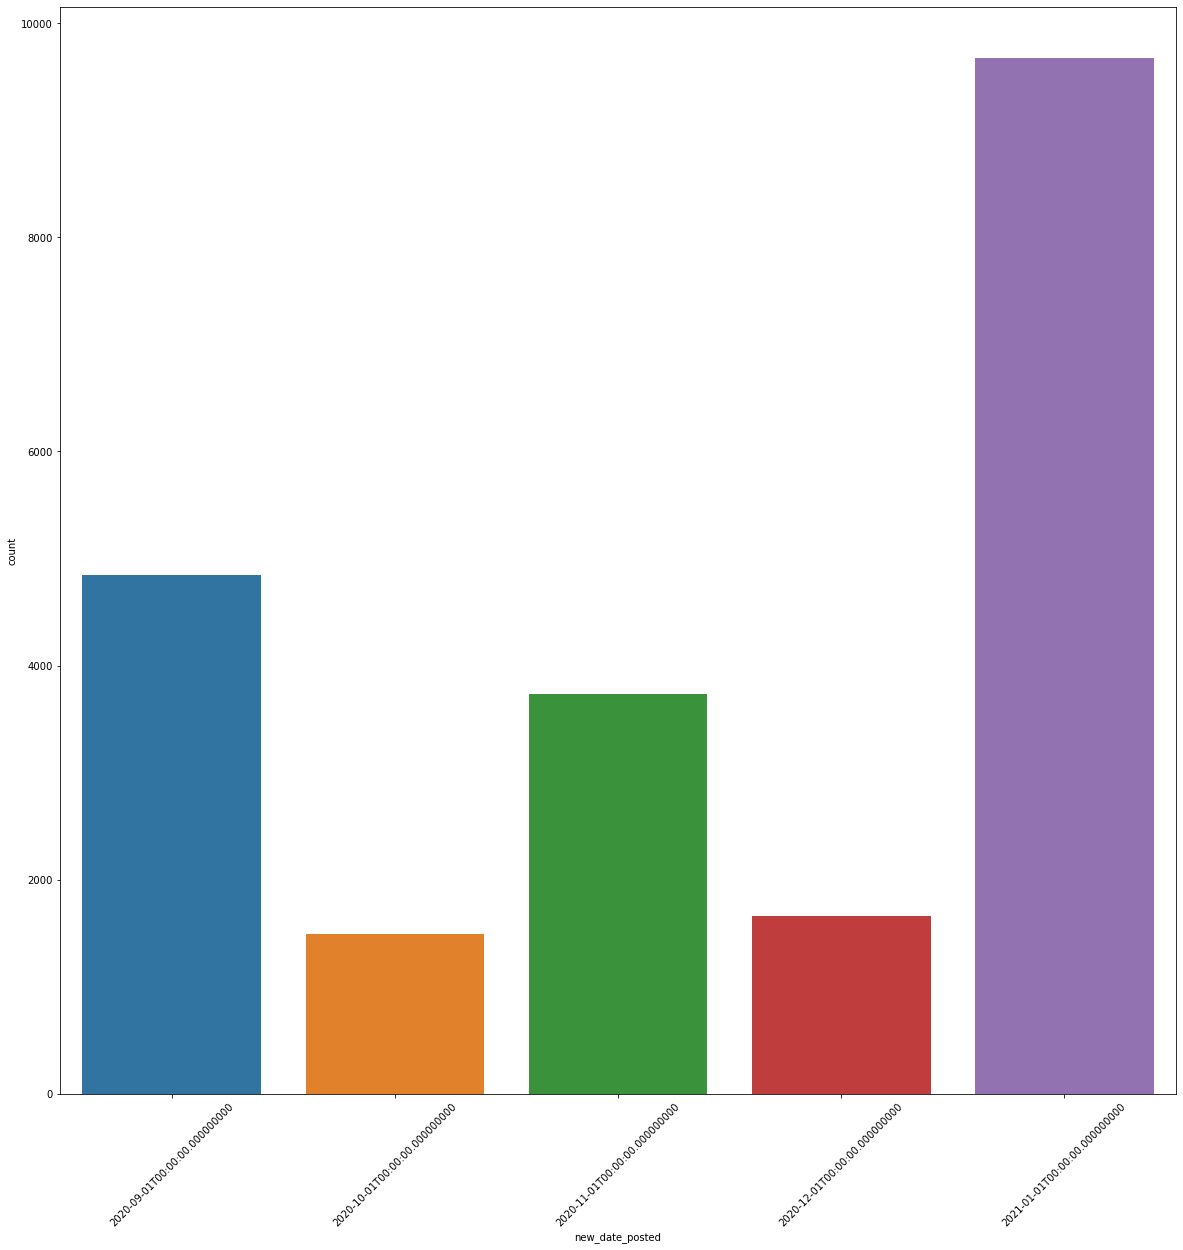

In [166]:
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(rotation=45)
sn.countplot(dff['new_date_posted'].sort_values())

In [167]:
dff.shape

(21404, 1508)

In [137]:
noNan = raw_data = raw_data.dropna(subset = ['resoFactsStats/onMarketDate'])

In [138]:
noNan.shape

(23430, 1507)

In [136]:
(raw_data['homeStatus'] == 'SOLD' | raw_data['homeStatus'] == 'RECENTLY_SOLD')]

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [99]:
raw_data['resoFactsStats/structureType'].value_counts()

Colonial                   8375
Other                      3221
Townhouse                  1177
Contemporary                880
Ranch / Rambler             851
Cape Cod                    677
Modern                      498
Tudor                       383
Loft                        297
Split-level                 234
Queen Anne / Victorian      210
Bungalow                    202
Duplex                      146
cottage                      93
Apartment                    65
Garden                       52
Craftsman                    34
mansion                      30
Triplex                      23
Spanish                      18
High Rise                    16
Duplex - Up/Down             13
Georgian                     12
French                       10
Garden Apartment              4
Garage to Garage              3
Santa Fe / Pueblo Style       2
Penthouse                     2
Duplex - Side/Side            1
House                         1
conventional                  1
Detached

In [98]:
raw_data['resoFactsStats/roofType'].value_counts()

Other                               2691
Asphalt                             2365
Shake / Shingle                     2010
Flat                                 327
Slate                                151
Tile                                 131
Pitched                              100
Composition                           85
Shingle                               78
Built-up                              74
Flat,Rubber                           39
Asphalt/Tar                           33
Rubber                                29
Pitched,Shingle                       28
Asphalt/Tar,Flat                      25
Metal                                 16
Flat,Pitched                           5
Shingle,Other                          5
Flat,Shingle                           4
Flat,Other                             3
Flat,Metal                             3
Pitched,Other                          2
Asphalt/Tar,Pitched                    2
Asphalt/Tar,Flat,Rubber                1
Asphalt/Tar,Flat

In [97]:
raw_data['resoFactsStats/propertyCondition'].value_counts()

Existing,Excellent            5275
Existing,Good                 1106
Excellent                     1088
New Construction,Excellent     652
Good                           500
                              ... 
Updates                          1
Spectaular                       1
SidingGood                       1
Updated                          1
DiamondNew                       1
Name: resoFactsStats/propertyCondition, Length: 245, dtype: int64

In [95]:
raw_data['resoFactsStats/lotSize'].value_counts()

2,500 sqft     3773
2,000 sqft     2349
4,000 sqft     2327
3,998 sqft     1429
0.06 Acres     1419
               ... 
3,726 sqft        1
11.47 Acres       1
5.22 Acres        1
8,775 sqft        1
5,105 sqft        1
Name: resoFactsStats/lotSize, Length: 5787, dtype: int64

In [93]:
raw_data['livingArea'].value_counts()

2000.0      1047
1200.0       839
1800.0       788
3000.0       669
1600.0       651
            ... 
4373.0         1
28080.0        1
155000.0       1
96152.0        1
54719.0        1
Name: livingArea, Length: 5337, dtype: int64

In [92]:
raw_data['resoFactsStats/livingArea'].value_counts()

2,000 sqft     1047
1,200 sqft      839
1,800 sqft      788
3,000 sqft      669
1,600 sqft      651
               ... 
4,723 sqft        1
4,686 sqft        1
13,568 sqft       1
3,895 sqft        1
5,603 sqft        1
Name: resoFactsStats/livingArea, Length: 5338, dtype: int64

In [90]:
raw_data['resoFactsStats/homeType'].value_counts()

Single Family            25780
Multiple Occupancy       18214
Residential              13097
Condo                     8544
Residential Income        4382
Townhouse                 2322
Apartment                 1751
Vacant Land                843
Land                       396
Mixed Use                  138
Other                      137
Mobile / Manufactured       26
Name: resoFactsStats/homeType, dtype: int64

In [89]:
raw_data['resoFactsStats/hasView'].value_counts()

False    70604
True      5025
Name: resoFactsStats/hasView, dtype: int64

In [88]:
raw_data['resoFactsStats/hasGarage'].value_counts()

False    60634
True     14996
Name: resoFactsStats/hasGarage, dtype: int64

In [86]:
raw_data['resoFactsStats/garageSpaces'].value_counts()

0       60808
1        8710
2        4045
3         831
4         655
5         211
6         190
8          31
7          26
10         23
9          11
32         10
200         5
240         4
12          4
15          4
35          4
16          4
25          3
43          3
11          3
79          3
120         3
18          2
126         2
150         2
38          2
110         2
40          2
26          1
492         1
61          1
185         1
180         1
67          1
50          1
561         1
113         1
70          1
48          1
46          1
876         1
106         1
24          1
75          1
1422        1
166         1
33          1
400         1
29          1
19          1
20          1
212         1
276         1
28          1
190         1
Name: resoFactsStats/garageSpaces, dtype: int64

In [84]:
raw_data['resoFactsStats/frontageLength'].value_counts()

0.0                      9
25.0                     4
Road Frontage: 20 Ft     2
30.0                     2
75.0                     2
40175.0                  2
4375.0                   2
0                        1
Road Frontage: 109 Ft    1
Road Frontage: 25 Ft     1
101.0                    1
Road Frontage: 153       1
42.0                     1
40.0                     1
26.0                     1
Road Frontage: 172 Ft    1
Road Frontage: 32 Ft     1
Name: resoFactsStats/frontageLength, dtype: int64

In [83]:
raw_data['resoFactsStats/foundationDetails/0'].value_counts()

Concrete Perimeter    475
Block                 133
Other                 114
Slab                   49
Stone                  17
Concrete                5
Name: resoFactsStats/foundationDetails/0, dtype: int64

In [81]:
raw_data['resoFactsStats/flooring/0'].value_counts()

Hardwood               12874
Tile                    3804
Carpet                   878
Other                    358
Laminate                 130
Wall To Wall Carpet      126
Ceramic Tile             103
Softwood                  53
Linoleum / Vinyl          40
Concrete                  28
Parquet                   18
Granite                   12
Linoleum                   9
None                       5
Marble                     2
Plywood                    1
Slate                      1
Name: resoFactsStats/flooring/0, dtype: int64

In [75]:
raw_data['resoFactsStats/fireplaces'].value_counts()

0.0    4934
1.0     631
2.0      85
3.0      14
4.0       6
5.0       4
6.0       2
9.0       1
Name: resoFactsStats/fireplaces, dtype: int64

In [102]:
raw_data['resoFactsStats/hasFireplace'].value_counts()

False    11640
True      7228
Name: resoFactsStats/hasFireplace, dtype: int64

In [72]:
raw_data['resoFactsStats/elementarySchoolDistrict'].value_counts()

UNKNOWN                        3393
Bronx 10                       3210
Bronx                          2387
Community District 29          1347
Community District 26          1298
                               ... 
School District Community 8       1
School Disctict 12                1
Richmond Town                     1
Community District 212            1
School Dist #8                    1
Name: resoFactsStats/elementarySchoolDistrict, Length: 374, dtype: int64

In [65]:
raw_data['resoFactsStats/basement'].value_counts()

Full                                            7363
Finished                                        6331
None                                            3455
Finished,Full                                   2807
Unfinished                                      1141
                                                ... 
Finished, Full, Walk-Out Access, See Remarks       1
Crawl Space,Full                                   1
Separate Entrance                                  1
Common,Finished,See Remarks                        1
Bilco Door(s),Full,Partial                         1
Name: resoFactsStats/basement, Length: 182, dtype: int64

In [58]:
raw_data['homeStatus'].value_counts()

SOLD               44912
RECENTLY_SOLD      17894
FOR_SALE           10945
PRE_FORECLOSURE     1702
FOR_RENT             151
FORECLOSED            23
PENDING                2
OTHER                  1
Name: homeStatus, dtype: int64

In [112]:
raw_data['homeStatus'].value_counts(normalize = True)

SOLD               0.593838
RECENTLY_SOLD      0.236599
FOR_SALE           0.144718
PRE_FORECLOSURE    0.022504
FOR_RENT           0.001997
FORECLOSED         0.000304
PENDING            0.000026
OTHER              0.000013
Name: homeStatus, dtype: float64

In [8]:
def detect_outlier(data_1):
    
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

<AxesSubplot:xlabel='address/zipcode', ylabel='price'>

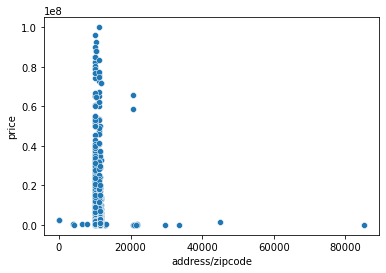

In [4]:
sn.scatterplot(x= 'address/zipcode',
                    y="price",
                    data= raw_data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

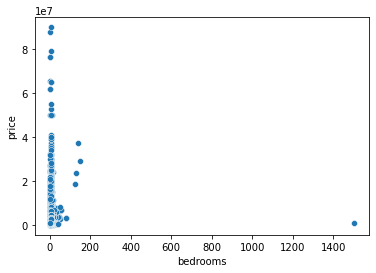

In [12]:
sn.scatterplot(x= 'bedrooms',
                    y="price",
                    data= raw_data)

In [13]:
raw_data.bedrooms.describe()

count    56166.000000
mean         3.983851
std          6.775822
min          1.000000
25%          3.000000
50%          3.000000
75%          5.000000
max       1502.000000
Name: bedrooms, dtype: float64

In [16]:
bedroom_out = detect_outlier(raw_data['bedrooms'])

In [104]:
price_out = detect_outlier(raw_data['price'])
price_out

[18029375.0,
 12300000.0,
 31550000.0,
 64680163.0,
 54250000.0,
 9517000.0,
 58521100.0,
 11920000.0,
 33000000.0,
 10995000.0,
 11500000.0,
 11129035.0,
 24000000.0,
 22800000.0,
 22000000.0,
 18500000.0,
 52392597.0,
 85000000.0,
 9500000.0,
 13800000.0,
 13250000.0,
 17932500.0,
 29500000.0,
 18500000.0,
 18640000.0,
 33072265.0,
 20100000.0,
 54300000.0,
 11500000.0,
 50206954.0,
 76250000.0,
 76250000.0,
 11550000.0,
 10500000.0,
 15000000.0,
 10750000.0,
 12000000.0,
 19276800.0,
 16900000.0,
 19550000.0,
 28500000.0,
 82202683.0,
 20050002.0,
 19500000.0,
 19000000.0,
 32500000.0,
 22000000.0,
 21800000.0,
 19750000.0,
 65000000.0,
 26900000.0,
 15995000.0,
 15000000.0,
 36000000.0,
 9975000.0,
 12750000.0,
 12988000.0,
 11999000.0,
 9950000.0,
 29000000.0,
 14600000.0,
 15950000.0,
 9500000.0,
 10399000.0,
 11900000.0,
 11700000.0,
 41000000.0,
 35000000.0,
 17250000.0,
 10950000.0,
 11950000.0,
 13750000.0,
 24000000.0,
 11500000.0,
 29950000.0,
 11950000.0,
 21500000.0,
 230

In [21]:
#raw_data

In [18]:
raw_data.describe()

,address/community,address/zipcode,bathrooms,bedrooms,dateposted,latitude,livingArea,longitude,price,priceHistory,...,schools/1/studentsPerTeacher,schools/1/totalCount,schools/2/assigned,schools/2/distance,schools/2/rating,schools/2/size,schools/2/studentsPerTeacher,schools/2/totalCount,yearBuilt,zpid
count,0.0,75611.000000,56577.000000,56166.000000,2.343000e+04,75604.000000,66419.000000,75604.000000,7.559100e+04,0.0,...,72815.000000,74719.000000,0.0,55543.000000,55506.000000,55482.000000,54985.000000,55543.000000,69898.000000,7.562900e+04
mean,NaN,10885.170068,2.743733,3.983851,1.604629e+12,40.699879,3515.221533,-73.928784,1.064926e+06,NaN,...,14.312230,1.275941,NaN,1.166651,3.702032,2008.657132,17.143894,1.205732,1947.429955,3.165939e+08
std,NaN,620.829405,5.910817,6.775822,9.375642e+09,0.100186,19275.605159,0.133133,2.717389e+06,NaN,...,2.423886,0.852413,NaN,1.244332,1.756765,1331.165212,2.768755,0.617115,38.606827,6.823292e+08
min,NaN,148.000000,0.500000,1.000000,1.451194e+12,40.498634,1.000000,-74.255333,1.000000e+00,NaN,...,7.000000,1.000000,NaN,0.000000,1.000000,101.000000,7.000000,1.000000,1.000000,2.977666e+07
25%,NaN,10314.000000,2.000000,3.000000,1.600183e+12,40.614593,1312.000000,-73.997108,4.770000e+05,NaN,...,13.000000,1.000000,NaN,0.500000,3.000000,526.000000,15.000000,1.000000,1920.000000,3.073761e+07
50%,NaN,11204.000000,2.000000,3.000000,1.606166e+12,40.696003,1848.000000,-73.906219,6.776710e+05,NaN,...,14.000000,1.000000,NaN,0.900000,3.000000,1946.000000,18.000000,1.000000,1940.000000,3.220877e+07
75%,NaN,11367.000000,3.000000,5.000000,1.610520e+12,40.763708,2600.000000,-73.832458,9.650000e+05,NaN,...,16.000000,1.000000,NaN,1.600000,4.000000,3281.000000,19.000000,1.000000,1970.000000,7.973850e+07
max,NaN,85128.000000,1346.000000,1502.000000,1.611281e+12,40.912682,986641.000000,-73.700432,1.000000e+08,NaN,...,24.000000,13.000000,NaN,208.700000,10.000000,5839.000000,24.000000,5.000000,4073.000000,2.146981e+09


In [110]:
df2 = raw_data.sort_values('price')

In [111]:
df2['price']

60967    1.0
9064     1.0
60952    1.0
62088    1.0
74700    1.0
        ... 
49646    NaN
54605    NaN
57269    NaN
63157    NaN
65687    NaN
Name: price, Length: 75630, dtype: float64

In [22]:
new_df = raw_data.dropna(subset= ['price'])

In [107]:
new_df = raw_data[raw_data['price']>= 50000]
new_df = raw_data[raw_data['homeStatus']== 'SOLD' | raw_data['homeStatus'] =='RECENTLY_SOLD']

In [108]:
label = new_df['price']

In [53]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df2['price'])

60967            1.0
9064             1.0
60952            1.0
62088            1.0
74700            1.0
62070            1.0
62053            1.0
27833            1.0
40712            1.0
57771            1.0
62000            1.0
5268             1.0
29081            1.0
15373            1.0
4067             1.0
61855            1.0
33714            1.0
38379            1.0
33715            1.0
33722            1.0
949              1.0
40340            1.0
69871            1.0
4150             1.0
38635            1.0
38634            1.0
47438            1.0
47437            1.0
47436            1.0
69970            1.0
61213            1.0
60904            1.0
59999            1.0
17705            1.0
57831            1.0
33719            1.0
11796            1.0
63557            1.0
38350            1.0
70462            1.0
44389            1.0
63787            1.0
44397            1.0
41230            1.0
35770            1.0
66345            1.0
41316            1.0
3944         

<AxesSubplot:xlabel='price'>

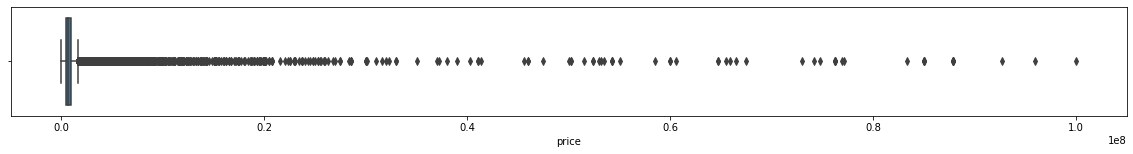

In [109]:
fig, ax =plt.subplots(figsize=(20,2))
sn.boxplot(x =label)

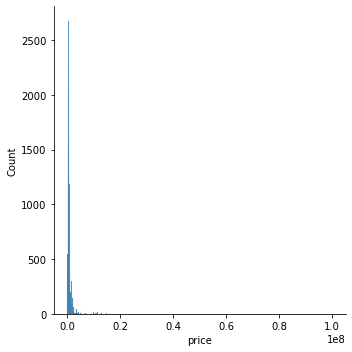

In [35]:
sn.displot(label)

In [29]:
min(label) , max(label)

(1.0, 100000000.0)

In [41]:
new_df.sort_values(by=['price'], ascending=False)['price']

60967            1.0
9064             1.0
60952            1.0
62088            1.0
74700            1.0
            ...     
10791     87920384.0
68908     90000000.0
22412     92725017.0
41870     96000000.0
24554    100000000.0
Name: price, Length: 75591, dtype: float64

<AxesSubplot:>

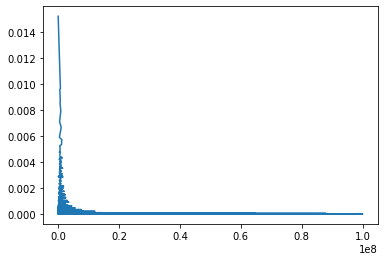

In [44]:
label.value_counts(normalize = True).sort_values().plot()

In [ ]:
# 10 dollars doesn't look right , taking it out

In [46]:
new_df.shape

(75591, 1507)

In [24]:
new_df['age'] = 2022 - new_df['yearBuilt']

<ipython-input-24-d0c8aed4ac03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age'] = 2022 - new_df['yearBuilt']


In [25]:
columns = ['bathrooms', 'bedrooms', 'latitude', 'longitude','age', 'livingArea', 'resoFactsStats/homeType' ]

In [26]:
df= new_df[columns]
df.head()
#df.info

,bathrooms,bedrooms,latitude,longitude,age,livingArea
0,2.0,5.0,40.877743,-73.910866,102.0,1889.0
1,8.0,8.0,40.892689,-73.910667,82.0,7000.0
2,3.0,4.0,40.883419,-73.918106,102.0,4233.0
3,6.0,5.0,40.885033,-73.917793,72.0,7000.0
4,6.0,5.0,40.881702,-73.914185,2.0,NaN


# Scaling 

In [55]:
y = label
X = df

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [57]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [58]:
model.fit(X_train, y_train)


Learning rate set to 0.078283
0:	learn: 2711978.3497738	total: 145ms	remaining: 2m 24s
1:	learn: 2677499.1292687	total: 153ms	remaining: 1m 16s
2:	learn: 2648341.8485350	total: 160ms	remaining: 53.2s
3:	learn: 2618092.6004805	total: 168ms	remaining: 41.8s
4:	learn: 2594147.4540297	total: 180ms	remaining: 35.9s
5:	learn: 2573340.4127471	total: 190ms	remaining: 31.5s
6:	learn: 2552947.7732536	total: 197ms	remaining: 27.9s
7:	learn: 2533379.3094256	total: 207ms	remaining: 25.7s
8:	learn: 2518235.5044598	total: 217ms	remaining: 23.9s
9:	learn: 2504494.5760335	total: 230ms	remaining: 22.8s
10:	learn: 2490620.6898056	total: 239ms	remaining: 21.5s
11:	learn: 2478555.5519220	total: 245ms	remaining: 20.2s
12:	learn: 2467101.3683330	total: 252ms	remaining: 19.1s
13:	learn: 2454270.4720465	total: 261ms	remaining: 18.4s
14:	learn: 2439597.9472087	total: 275ms	remaining: 18s
15:	learn: 2428016.4993015	total: 283ms	remaining: 17.4s
16:	learn: 2420890.0864051	total: 288ms	remaining: 16.7s
17:	learn: 

157:	learn: 2055833.1257847	total: 1.39s	remaining: 7.4s
158:	learn: 2054906.1147693	total: 1.4s	remaining: 7.38s
159:	learn: 2054185.0847252	total: 1.41s	remaining: 7.38s
160:	learn: 2053199.5756369	total: 1.41s	remaining: 7.36s
161:	learn: 2047706.3532979	total: 1.42s	remaining: 7.33s
162:	learn: 2046924.1445726	total: 1.42s	remaining: 7.31s
163:	learn: 2045537.1009808	total: 1.43s	remaining: 7.3s
164:	learn: 2044539.3450251	total: 1.45s	remaining: 7.32s
165:	learn: 2042909.4360870	total: 1.45s	remaining: 7.31s
166:	learn: 2042021.2467773	total: 1.46s	remaining: 7.29s
167:	learn: 2041113.0869142	total: 1.47s	remaining: 7.28s
168:	learn: 2040085.6228316	total: 1.48s	remaining: 7.27s
169:	learn: 2039662.0778922	total: 1.49s	remaining: 7.27s
170:	learn: 2039019.9403924	total: 1.5s	remaining: 7.25s
171:	learn: 2037945.0485683	total: 1.5s	remaining: 7.24s
172:	learn: 2036106.1902496	total: 1.51s	remaining: 7.23s
173:	learn: 2035764.5100621	total: 1.52s	remaining: 7.23s
174:	learn: 2035066

310:	learn: 1885756.9389148	total: 2.61s	remaining: 5.79s
311:	learn: 1885368.3702913	total: 2.62s	remaining: 5.78s
312:	learn: 1884897.9757559	total: 2.63s	remaining: 5.77s
313:	learn: 1884601.7705167	total: 2.63s	remaining: 5.76s
314:	learn: 1883701.8699134	total: 2.65s	remaining: 5.75s
315:	learn: 1882729.0839343	total: 2.66s	remaining: 5.76s
316:	learn: 1880474.4018639	total: 2.67s	remaining: 5.75s
317:	learn: 1879798.7318130	total: 2.68s	remaining: 5.75s
318:	learn: 1879746.2736682	total: 2.69s	remaining: 5.74s
319:	learn: 1877706.7149359	total: 2.7s	remaining: 5.73s
320:	learn: 1877496.6752958	total: 2.7s	remaining: 5.71s
321:	learn: 1877387.0038402	total: 2.71s	remaining: 5.71s
322:	learn: 1876533.9837170	total: 2.72s	remaining: 5.7s
323:	learn: 1875444.5888066	total: 2.73s	remaining: 5.7s
324:	learn: 1873594.6967710	total: 2.74s	remaining: 5.69s
325:	learn: 1873196.3199953	total: 2.75s	remaining: 5.69s
326:	learn: 1871478.9363398	total: 2.76s	remaining: 5.68s
327:	learn: 187050

461:	learn: 1759993.8135589	total: 4.03s	remaining: 4.7s
462:	learn: 1758732.4141146	total: 4.04s	remaining: 4.69s
463:	learn: 1754808.7390502	total: 4.05s	remaining: 4.68s
464:	learn: 1753917.9370421	total: 4.06s	remaining: 4.67s
465:	learn: 1753639.0827635	total: 4.07s	remaining: 4.66s
466:	learn: 1753544.5744111	total: 4.08s	remaining: 4.66s
467:	learn: 1752523.6496850	total: 4.09s	remaining: 4.65s
468:	learn: 1748936.3256251	total: 4.1s	remaining: 4.64s
469:	learn: 1748721.3942116	total: 4.1s	remaining: 4.63s
470:	learn: 1747018.3651912	total: 4.11s	remaining: 4.62s
471:	learn: 1746906.5301004	total: 4.12s	remaining: 4.61s
472:	learn: 1745962.0052856	total: 4.13s	remaining: 4.6s
473:	learn: 1745753.8838193	total: 4.14s	remaining: 4.59s
474:	learn: 1744159.5388563	total: 4.14s	remaining: 4.58s
475:	learn: 1743149.2874169	total: 4.15s	remaining: 4.57s
476:	learn: 1742163.7568097	total: 4.16s	remaining: 4.56s
477:	learn: 1742149.3949133	total: 4.16s	remaining: 4.54s
478:	learn: 174121

623:	learn: 1637066.9691891	total: 5.43s	remaining: 3.27s
624:	learn: 1636996.1753530	total: 5.44s	remaining: 3.27s
625:	learn: 1636277.9734299	total: 5.45s	remaining: 3.26s
626:	learn: 1635324.6801674	total: 5.46s	remaining: 3.25s
627:	learn: 1634552.3828058	total: 5.47s	remaining: 3.24s
628:	learn: 1634359.8635792	total: 5.47s	remaining: 3.23s
629:	learn: 1634236.8157153	total: 5.49s	remaining: 3.22s
630:	learn: 1634227.8107632	total: 5.5s	remaining: 3.21s
631:	learn: 1632996.8987405	total: 5.51s	remaining: 3.21s
632:	learn: 1632990.2353748	total: 5.52s	remaining: 3.2s
633:	learn: 1632008.1367216	total: 5.53s	remaining: 3.19s
634:	learn: 1631710.2565785	total: 5.54s	remaining: 3.18s
635:	learn: 1630906.9323605	total: 5.55s	remaining: 3.17s
636:	learn: 1628841.6343772	total: 5.56s	remaining: 3.17s
637:	learn: 1627911.0377519	total: 5.57s	remaining: 3.16s
638:	learn: 1627577.4108991	total: 5.58s	remaining: 3.15s
639:	learn: 1627570.9175070	total: 5.59s	remaining: 3.14s
640:	learn: 1626

773:	learn: 1559898.4966885	total: 7.01s	remaining: 2.05s
774:	learn: 1557627.3799401	total: 7.02s	remaining: 2.04s
775:	learn: 1557261.7177483	total: 7.03s	remaining: 2.03s
776:	learn: 1557198.9758502	total: 7.04s	remaining: 2.02s
777:	learn: 1557175.5019969	total: 7.04s	remaining: 2.01s
778:	learn: 1557100.4926721	total: 7.05s	remaining: 2s
779:	learn: 1555719.4089112	total: 7.05s	remaining: 1.99s
780:	learn: 1555550.8224912	total: 7.06s	remaining: 1.98s
781:	learn: 1555096.4031123	total: 7.07s	remaining: 1.97s
782:	learn: 1554301.3433985	total: 7.07s	remaining: 1.96s
783:	learn: 1553837.2423179	total: 7.08s	remaining: 1.95s
784:	learn: 1553598.4233321	total: 7.1s	remaining: 1.94s
785:	learn: 1551449.4590094	total: 7.1s	remaining: 1.93s
786:	learn: 1550276.1691882	total: 7.11s	remaining: 1.92s
787:	learn: 1550263.7092517	total: 7.11s	remaining: 1.91s
788:	learn: 1549959.3248653	total: 7.12s	remaining: 1.9s
789:	learn: 1549746.1008306	total: 7.13s	remaining: 1.89s
790:	learn: 1549318.

917:	learn: 1487683.5960728	total: 8.24s	remaining: 737ms
918:	learn: 1487477.2282088	total: 8.25s	remaining: 728ms
919:	learn: 1487167.0943142	total: 8.26s	remaining: 718ms
920:	learn: 1486841.9853954	total: 8.27s	remaining: 709ms
921:	learn: 1486227.6331538	total: 8.28s	remaining: 700ms
922:	learn: 1485893.7119555	total: 8.29s	remaining: 691ms
923:	learn: 1485394.9025146	total: 8.3s	remaining: 682ms
924:	learn: 1485199.0096356	total: 8.31s	remaining: 674ms
925:	learn: 1485054.5788500	total: 8.32s	remaining: 665ms
926:	learn: 1484374.7409710	total: 8.33s	remaining: 656ms
927:	learn: 1484003.0566140	total: 8.34s	remaining: 647ms
928:	learn: 1483675.3993658	total: 8.35s	remaining: 638ms
929:	learn: 1483487.5786522	total: 8.35s	remaining: 629ms
930:	learn: 1483365.8646061	total: 8.36s	remaining: 620ms
931:	learn: 1482939.4484851	total: 8.37s	remaining: 611ms
932:	learn: 1482779.3102385	total: 8.38s	remaining: 602ms
933:	learn: 1482375.7610922	total: 8.38s	remaining: 592ms
934:	learn: 148

In [68]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
#print('R2: {:.2f}’.format(r2)')

Testing performance
RMSE: 1949826.99


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

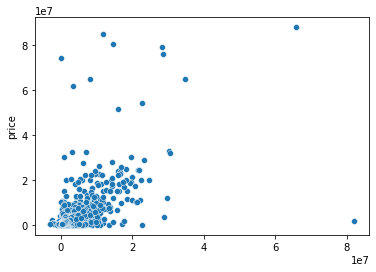

In [69]:
sn.scatterplot(pred, y_test)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

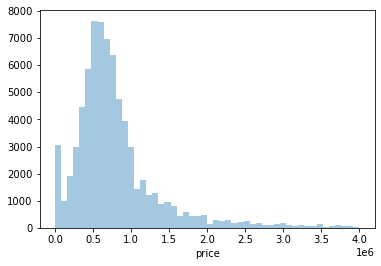

In [50]:
label = new_df['price']

sn.distplot(raw_data.loc[raw_data['price']<4000000, 'price'], kde= False)

In [10]:
label.describe()

count    7.559100e+04
mean     1.064926e+06
std      2.717389e+06
min      1.000000e+00
25%      4.770000e+05
50%      6.776710e+05
75%      9.650000e+05
max      1.000000e+08
Name: price, dtype: float64

In [12]:
label.shape

(75630,)

In [19]:
label.isna().value_counts()

False    75591
True        39
Name: price, dtype: int64